/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


content shape: (266, 400, 3)
style shape: (250, 400, 3)


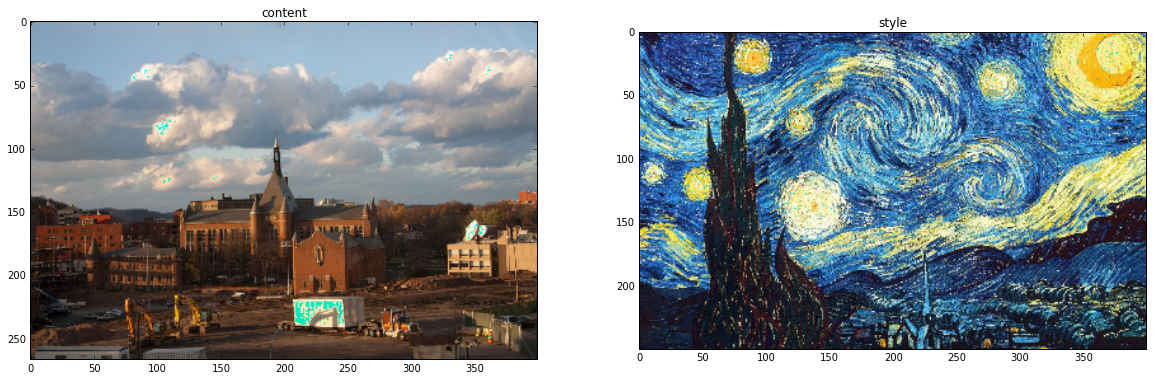

In [1]:
import sys
import os
import mxnet as mx
import numpy as np
from skimage import io, transform

import matplotlib.pyplot as plt

sys.path.append('../python')

from ml.vision.style_transfer.classic import classic_transfer, ClassicTransferArgs
from ml.vision.model_zoo.vgg import VGG19AvgOutput


def resize_img(img, long_edge):
    ratio = float(long_edge) / max(img.shape[0:2])
    new_size = (int(img.shape[0] * ratio), int(img.shape[1] * ratio))
    img = np.asarray(transform.resize(img, new_size)) * 256
    return img

############## load and resize image =====================
long_edge = 400
content_img = io.imread('../images/IMG_4343.jpg')
content_img = resize_img(content_img, long_edge)
style_img = io.imread('../images/starry_night.jpg')
style_img = resize_img(style_img, long_edge)

print('content shape: %s' % str(content_img.shape))
print('style shape: %s' % str(style_img.shape))

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.title('content')
plt.imshow(content_img.astype('uint8'))
plt.subplot(1, 2, 2)
plt.title('style')
plt.imshow(style_img.astype('uint8'))
plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]


eps (0.000022) < args.stop_eps (0.000100), training finished


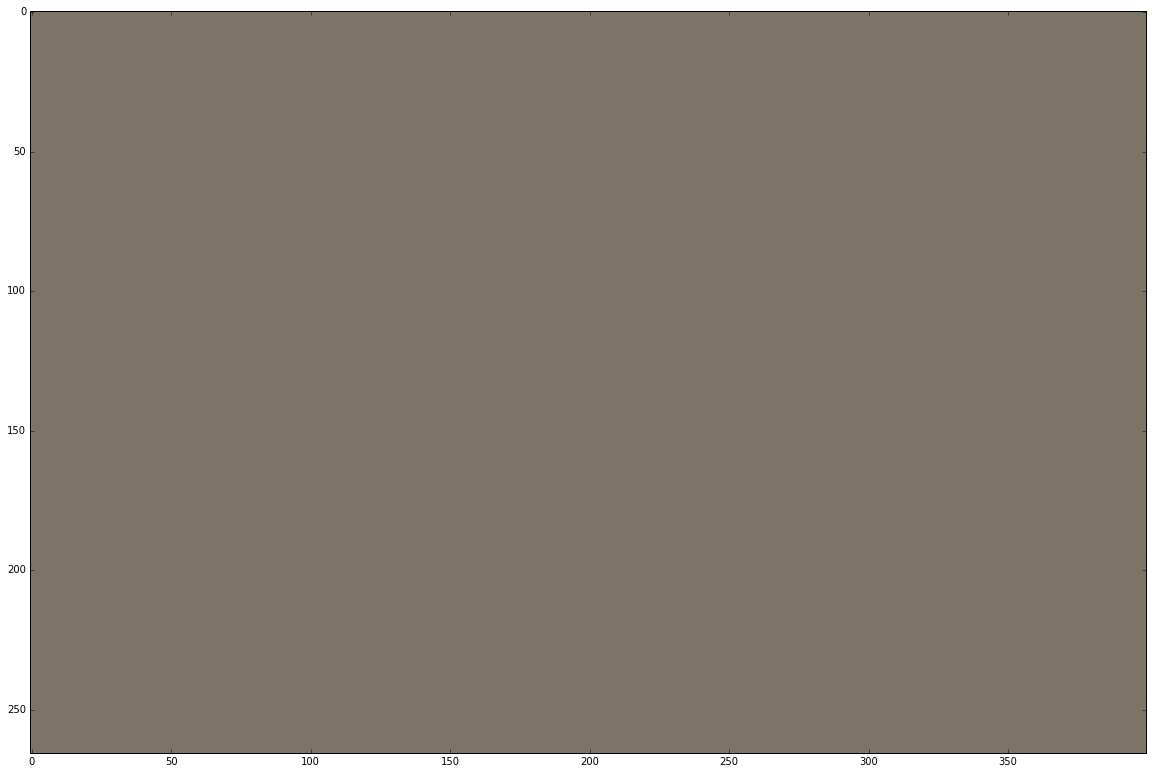

In [2]:
content_img = mx.nd.array(content_img)
style_img = mx.nd.array(style_img)
transfer_args = ClassicTransferArgs()

if not os.path.exists('images'):
    os.mkdir('images')
    
i = 1
for image in classic_transfer(content_img, style_img, transfer_args, ctx = mx.gpu(), verbose = False):
    pass

plt.figure(figsize=(20,20))
plt.imshow(image.asnumpy().astype('uint8'))
plt.show()